# Melanoma Detection

This is an attempt to differentiate between three types of skin lesions, melanoma, nevi and seborrheic keratosesone. Melanoma is cancerous; the other three are benign.

The data and objective are from the [ISIC 2017: Skin Lesion Analysis Towards Melanoma Detection](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a), as presented in the [udacity/dermatologist-ai](https://github.com/udacity/dermatologist-ai) repository. I used same [train](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/train.zip), [vaidation](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/valid.zip) and [test](https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip) data hosted by Udacity.

I originally worked on the problem in the [Udacity Deep Learning Nanodegree](https://www.udacity.com/course/deep-learning-nanodegree--nd101) program. I wanted to revisit the problem using the [fastai](https://github.com/fastai/fastai) library.


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
np.random.seed(303)

## Load and view data

In [4]:
datapath = Path('../data/melanoma-detection').resolve() # absolute path to data
!ls $datapath

models	test  train  valid


In [5]:
bs=64

In [6]:
# # speed processing by reducing image size to max dimension of 300px
# # NB this overwrites original images!
# for dtype in ['test', 'train', 'valid']:
#     for dclass in ['melanoma', 'nevus', 'seborrheic_keratosis']:
#         path = datapath / dtype / dclass
#         print(dtype, dclass)
#         verify_images(path, max_size=300)

In [7]:
tfms = get_transforms(flip_vert=True) # add vertical flip, since these are top down

## Learn

In [8]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs, size=32, num_workers=4).normalize(imagenet_stats)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.403502,1.128261,0.473333
2,1.147984,1.162834,0.486667
3,0.994386,1.071668,0.473333
4,0.917006,1.087107,0.480000


In [11]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.787754,0.978451,0.386667
2,0.791961,0.909711,0.413333
3,0.745898,0.878972,0.373333


In [12]:
learn.freeze()
learn.save('res50-32')

In [13]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs, size=64, num_workers=4).normalize(imagenet_stats)
learn.data = data

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.748101,0.854306,0.386667
2,0.721724,0.853283,0.360000
3,0.688194,0.872735,0.393333
4,0.668403,0.850067,0.373333


In [15]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.657976,0.896791,0.353333
2,0.636448,0.736646,0.306667
3,0.583740,0.699391,0.300000


In [16]:
learn.freeze()
learn.save('res50-64')

In [17]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs, size=128, num_workers=4).normalize(imagenet_stats)
learn.data = data

In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.623550,0.756782,0.340000
2,0.597299,0.765434,0.360000
3,0.572137,0.680655,0.306667
4,0.557917,0.666514,0.293333


In [19]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.553443,0.678564,0.313333
2,0.534303,0.623051,0.240000
3,0.482277,0.631325,0.253333


In [20]:
learn.freeze()
learn.save('res50-128')

In [21]:
data = ImageDataBunch.from_folder(datapath, ds_tfms=tfms, bs=bs // 2, size=256, num_workers=4).normalize(imagenet_stats)
learn.data = data

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.580475,0.710366,0.293333
2,0.562832,0.649418,0.273333
3,0.535573,0.618943,0.246667
4,0.502137,0.620212,0.240000


In [23]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-3))

epoch,train_loss,valid_loss,error_rate
1,0.529985,0.609149,0.260000
2,0.534119,0.563790,0.206667
3,0.458594,0.551085,0.233333


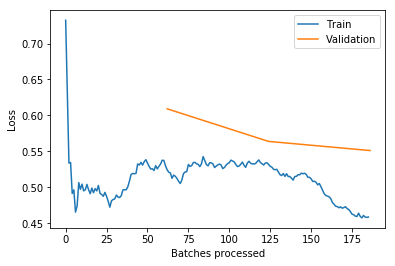

In [24]:
learn.recorder.plot_losses()

In [25]:
learn.freeze()
learn.save('res50-256')

### Results

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

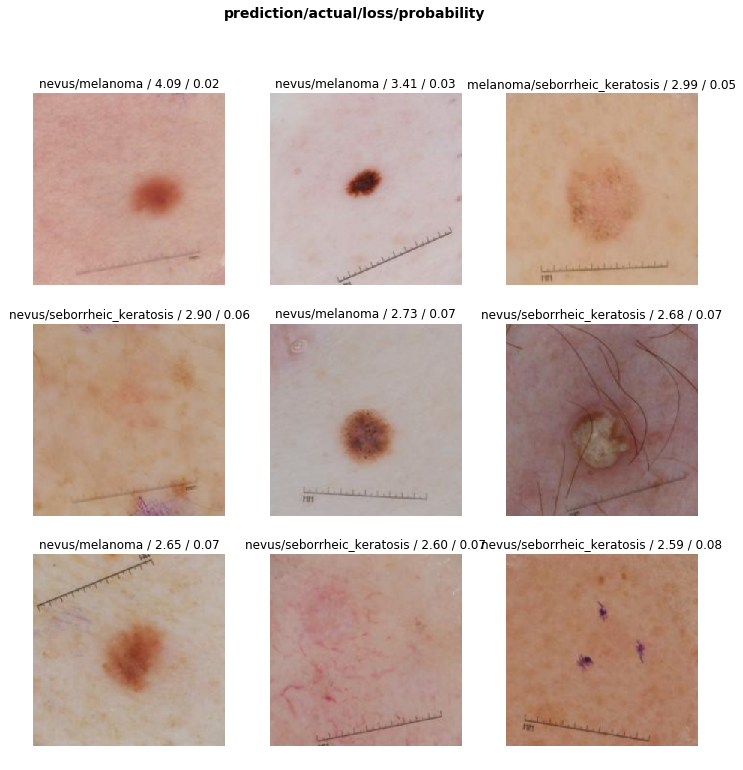

In [27]:
interp.plot_top_losses(9, figsize=(12, 12))

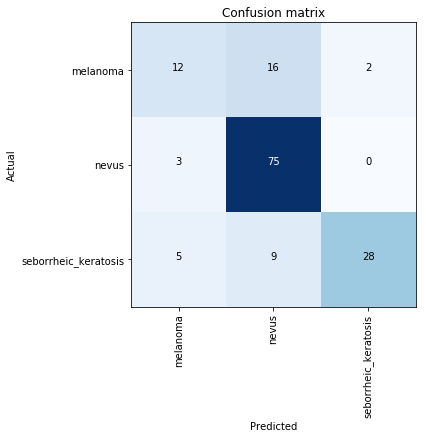

In [28]:
interp.plot_confusion_matrix(figsize=(6, 6))